In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [19]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/li_niu_ping/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_farm = "li_niu_ping"
wind_turbine = "2"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)
feature = feature.loc[speed.index]
toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (1371, 75)
speed.shape: (1371, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

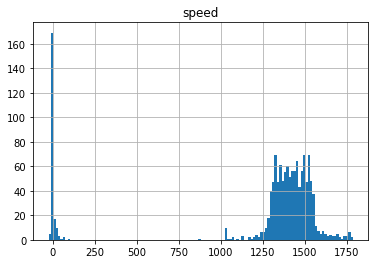

In [5]:
speed.hist(bins=128)

feature.shape: (1163, 75)
speed.shape: (1163, 1)


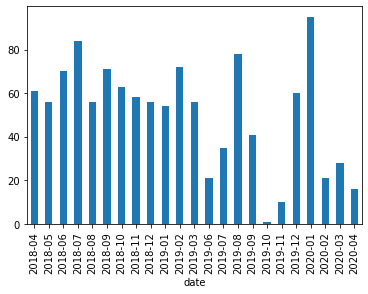

In [11]:
SPEED_THRESHOLD = 250
feature = feature[speed.speed >= SPEED_THRESHOLD]
speed = speed[speed.speed >= SPEED_THRESHOLD]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [12]:
# 划分train set, test set
train_start = "2018-04"
train_end = "2019-08"

test_start = "2019-09"
test_end = "2020"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (891, 75)
feature_test.shape: (272, 75)


In [13]:
feature_test = feature
# speed_test = speed

In [14]:
detector = model_entry.OutlierDetector()

In [16]:
detector.fit(feature_train, contamination=0.01)

In [32]:
anomaly_scores_train = detector.decision_scores
label_train = detector.label
# 测试
anomaly_scores_test = detector.decision_function(feature_test)
label_test = detector.predict(feature_test)

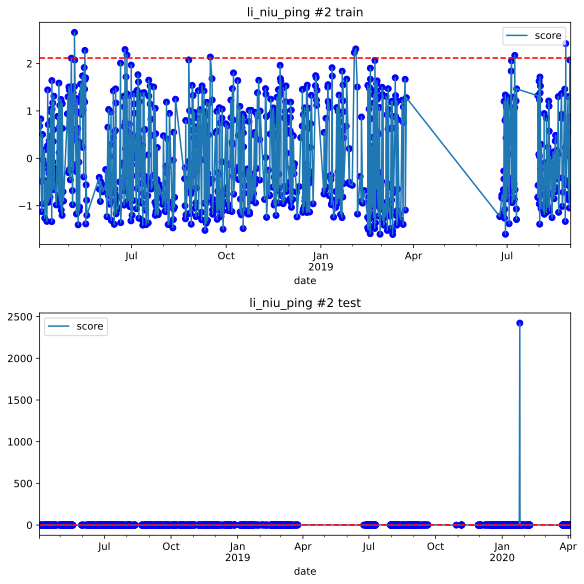

In [26]:
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, wind_farm, 
    wind_turbine)

In [33]:
temp_index = anomaly_scores_test[anomaly_scores_test.score > 1000].index
anomaly_scores_test.drop(index=temp_index, inplace=True)
label_test.drop(index=temp_index, inplace=True)

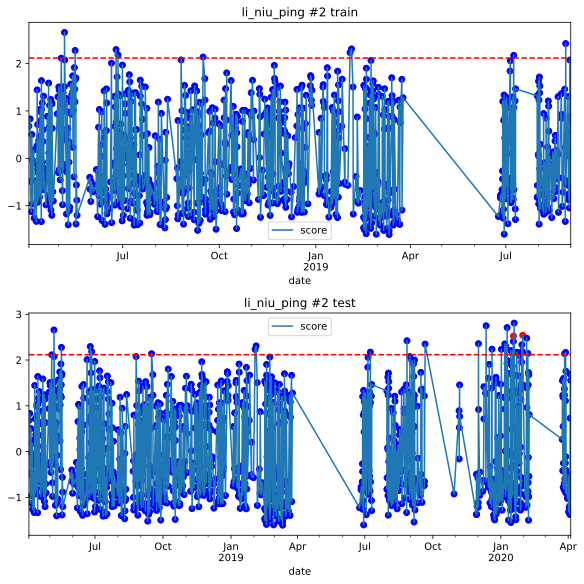

In [34]:
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, wind_farm, 
    wind_turbine)